张子豪 2019-11-29

In [1]:
# 忽略烦人的红色提示
import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf

In [3]:
# 定义辅助函数

def get_weights(n_features, n_labels):
    """
    返回正太分布随机初始化的权重矩阵
    :param n_features: 输入特征数
    :param n_labels: 标签数
    """
    return tf.Variable(tf.compat.v1.truncated_normal((n_features, n_labels)))


def get_biases(n_labels):
    """
    返回初始化为0的偏置项
    :param n_labels: 标签数
    """
    return tf.Variable(tf.zeros(n_labels))


def linear(input, w, b):
    """
    指定线性加权求和的线性函数，返回线性操作求得的值
    :param input: 输入特征
    :param w: 权重矩阵
    :param b: 偏置项
    """
    return tf.add(tf.matmul(input, w), b)


## MNIST 手写数字数据集

[MNIST 数据集的官网](http://yann.lecun.com/exdb/mnist/)
```
ModuleNotFoundError: No module named 'tensorflow.examples.tutorials'
```
检查tensorflow中是否含有tutorials

1.在...\Python3\Lib\site-packages\tensorflow_core\examples文件夹，如果文件夹下只有saved_model这个文件，则是没有tutorials。

2.进入[github的tensorflow主页](https://github.com/tensorflow/tensorflow)下载缺失的文件，把tutorials整个文件夹拷贝到examples文件夹下。

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
def mnist_features_labels(n_labels):
    """
    获取前n类数据的特征和标签，返回(特征，标签)元组
    """
    mnist_features = []
    mnist_labels = []

    # read_data_sets is deprecated and will be removed in a future version.
    mnist = input_data.read_data_sets('mnist', one_hot=True)
   
    # 为了运行更快些，我们只看前一万张图片
    for mnist_feature, mnist_label in zip(*mnist.train.next_batch(10000)):

        # Add features and labels if it's for the first <n>th labels
        if mnist_label[:n_labels].any():
            mnist_features.append(mnist_feature)
            mnist_labels.append(mnist_label[:n_labels])

    return mnist_features, mnist_labels

In [6]:

# 输入特征数（28*28 = 784）
n_features = 784

# 只看前3类图像
n_labels = 3

g = tf.Graph()
with g.as_default():
    # 定义好特征和标签的占位符
    features = tf.compat.v1.placeholder(tf.float32)
    labels = tf.compat.v1.placeholder(tf.float32)

    # 调用todo.py文件中定义的函数，获取初始化的权重矩阵和偏置项
    w = get_weights(n_features, n_labels)
    b = get_biases(n_labels)

    # 定义线性操作
    logits = linear(features, w, b)

    # 获取训练数据的特征和标签
    train_features, train_labels = mnist_features_labels(n_labels)

Extracting mnist\train-images-idx3-ubyte.gz
Extracting mnist\train-labels-idx1-ubyte.gz
Extracting mnist\t10k-images-idx3-ubyte.gz
Extracting mnist\t10k-labels-idx1-ubyte.gz


In [8]:
len(train_features)

3174

In [9]:
len(train_labels)

3174

In [10]:
train_features[0].shape

(784,)

In [11]:
train_features[1].shape

(784,)

In [12]:
train_features[5].shape

(784,)

In [15]:
# train_features[5]
# 784 = 28 x 28

In [16]:
train_labels[5]

array([1., 0., 0.])

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

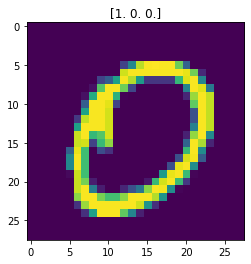

In [23]:
i = 5
title = train_labels[i]
plt.imshow(train_features[i].reshape(28,28))
plt.title(title)
plt.show()

In [35]:
with tf.compat.v1.Session(graph=g) as session:

    session.run(tf.compat.v1.global_variables_initializer())

    # 将3个神经元的输出概率进行softmax归一化
    prediction = tf.nn.softmax(logits)

    # 计算交叉熵损失函数
    # tf.reduce_sum(input_tensor, axis=None, keepdims=False, name=None) reduction_indices=1
    cross_entropy = -tf.reduce_sum(labels * tf.compat.v1.log(prediction), 1)

    # 取交叉熵损失函数的平均值作为损失函数
    loss = tf.reduce_mean(cross_entropy)

    # 定义梯度下降的学习率
    learning_rate = 0.08

    # 定义梯度下降优化器，最小化损失函数
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    # 运行优化器，获得损失函数
    _, l = session.run(
        [optimizer, loss],
        feed_dict={features: train_features, labels: train_labels})

    # 查看结果
    # print(session.run(prediction))
    # print(prediction.eval())
#     cross_entropy_array = cross_entropy.eval()
#     loss_array = loss.eval()
#     w_array = w.eval()
#     b_array = b.eval()
    
# 打印输出损失函数，注意format里面是l不是1
print('损失函数: {}'.format(l))


损失函数: 6.8803558349609375


In [30]:
print(logits)

Tensor("Add:0", dtype=float32)
